In [1]:
from multilayernn import * #Import from own library
import csv #for reading csv directly to numpy

# IRIS

## 1. Data Processing and One Hot Encoding

In [2]:
#Load data
data = []
with open('datasets/iris.data','r')as f:
    file = csv.reader(f)
    for row in file:
        if row[4] == 'Iris-setosa':
            row[4] = '0'
            float_list = list(map(float, row)) 
            data.append(float_list)
        
        elif row[4] == 'Iris-versicolor':
            row[4] = '1'
            float_list = list(map(float, row)) 
            data.append(float_list)
        
        else: #virginica
            row[4] = '2'
            float_list = list(map(float, row)) 
            data.append(float_list)

data = np.array(data) #convert to numpy
np.random.shuffle(data) #Shuffle the input data

In [3]:
#separating labels and pixels
all_labels= data[:, -1].copy().astype(int)
all_data= data[:, :-1].copy()
# The characteristics of MNIST data pixels = 784 samples = 42000 classes = 10

In [4]:
#Convert to onehot encoding
features = 4
samples = len(all_data)
classes = 3
all_data = all_data.T
all_label=np.zeros((classes, samples))
for col in range (samples):
    all_label[all_labels[col],col]=1
#Scaling Down of dataset
all_data = all_data/5 #scaled the data

In [5]:
#Generate Test and Training Data from the Sample 80% vs 20%
train_data = all_data[:, int(samples*0.2):]
train_label = all_label[:, int(samples*0.2):]
train_actual_label = all_labels[int(samples*0.2):]

test_data = all_data[:, :int(samples*0.2)]
test_label = all_label[:, :int(samples*0.2)]
test_actual_label = all_labels[:int(samples*0.2)]

## 2. Training of Model

Hypermeters:
1. Tune the right weights as improper weights will cause exploding outputs
2. Tune the learning rate and gamma
3. Tune the number of epoch to be trained

In [6]:
#Create Mulit Layer Network
nodes_per_layer = [4, 10, 3]
iris_nn = deepNN(nodes_per_layer, learning_rate = 0.2, gamma = 0.7, epoch=1000)

training...
Epoch:0 | Cross Entropy Error: 1.2120171758113316 | Accuacy: 36.666666666666664%
Epoch:1 | Cross Entropy Error: 1.1351380420803874 | Accuacy: 36.666666666666664%
Epoch:2 | Cross Entropy Error: 1.0782682343033014 | Accuacy: 65.0%
Epoch:3 | Cross Entropy Error: 1.0421126950533988 | Accuacy: 56.666666666666664%
Epoch:4 | Cross Entropy Error: 1.021862610543136 | Accuacy: 39.166666666666664%
Epoch:5 | Cross Entropy Error: 1.0087566638023835 | Accuacy: 36.666666666666664%
Epoch:6 | Cross Entropy Error: 0.9985511177774663 | Accuacy: 36.666666666666664%
Epoch:7 | Cross Entropy Error: 0.9901787157916428 | Accuacy: 39.166666666666664%
Epoch:8 | Cross Entropy Error: 0.9818711170497796 | Accuacy: 40.0%
Epoch:9 | Cross Entropy Error: 0.9732653920038817 | Accuacy: 40.0%


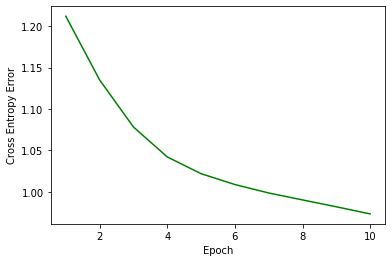

<Figure size 432x288 with 0 Axes>

In [7]:
#Train the network
iris_nn.train_model(train_data, train_label, train_actual_label, verbose = True, filename="accuracy/iris/irisdata")

## 3. Testing of Model

In [10]:
test_error, test_accuracy = iris_nn.test_model(test_data, test_label, test_actual_label, filename="accuracy/iris/irisdata")

Accuracy on Test Data: 36.666666666666664% | Cross Entropy Error: 0.8949696722213557


## Conclusion:
Check accuracy folder for all the error and accuracy data.

<hr>